# Clustering

Clustering is the task of grouping a set of items together in such a way that items in one group (a cluster) are more similar to each other than to those in other groups. There are several types of clustering algorithms: 

*   Hierarchical clustering (e.g. Linkage clustering)
*   Centroid-based clustering (e.g. k-means)
*   Distribution-based clustering (e.g. Expectation-Maximization)
*   Density-based clustering (e.g. DBSCAN)

We will look at one of the more simpler approaches: centroid-based clustering.

## I. K-Means Algorithm

Suppose we have a dataset {$x_1$, $x_2$, $x_3$, ..., $x_N$} consisting of $N$ observations of $D$ dimensional vectors **x** (i.e. $D$ features).

The goal is to partition the dataset into $K$ clusters. Therefore, the number of clusters in our dataset needs to be known a priori.

A cluster is a group of data points whose distances between one another in $D$-dimensional space are small compared to points outside the cluster.

This can be formalized by introducing a $D$-dimensional mean vector $\mu_k$, where $k = 1,2,3,...K$. This represents the center of the cluster.

The K-means clustering algorithm assigns a vector $x_{i,j}$ to the cluster which minimizes the following distortion measure: $J_k = ||x_{i,j} - \mu_k||^2$

The mean vector is then updated by computing the mean intensity value of the considered cluster such that

\begin{equation}
\mu_k = \frac{\sum\limits_i \sum\limits_j r_{i,j,k}x_{i,j}}{\sum\limits_i \sum\limits_j r_{i,j}}
\end{equation}

where

\begin{equation}
r_{i,j,k}=\begin{cases}
    1, & \text{if $k = arg_k min(||x_{i,j} - \mu_k||^2)$}\\
    0, & \text{otherwise}.
  \end{cases}
\end{equation}

### A. First principles

In [1]:
# Import the necessary modules
import numpy as np
import math
import matplotlib.pyplot as plt

Let's generate a two-dimensional dataset that we can easily visualize later. 

Note that the first 7 points are similar to each other (therefore they would belong to cluster 1) while the next 7 points are also similar to each other (they would belong to cluster 2)

In [2]:
# Generate a dataset
data = np.array([[2,2], [2,3], [3,2], [3,3], [5,4], [1,1], [6,4], [15,12], [14,14], [18,14], [25,30], [21,17], [18,16], [12,18]])



In [3]:
# Randomly initialize the means to some value (x1, x2) within our two-dimensional space
means = np.array([[np.random.random()*30,np.random.random()*30], [np.random.random()*30,np.random.random()*30]])



We'll iterate 4 times, at each iteration using the K-Means algorithm to generate new values for the means.



We use blue to denote the membership of a point of cluster 1, and red to denote the membership of a point of cluster 2.



Allocation of points to means - iteration: 0
These are the points closer to mean 1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12]
These are the points closer to mean 2: [10, 13]
Means at iteration: 0
[[10.40746109 10.77235593]
 [ 7.53177447 13.39813537]]


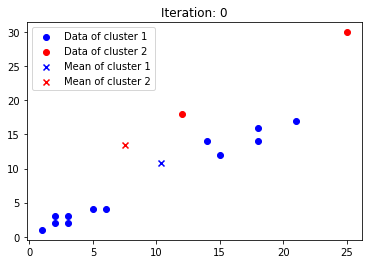

Allocation of points to means - iteration: 1
These are the points closer to mean 1: [0, 1, 2, 3, 4, 5, 6, 7, 8]
These are the points closer to mean 2: [9, 10, 11, 12, 13]
Means at iteration: 1
[[ 9.          7.66666667]
 [18.5        24.        ]]


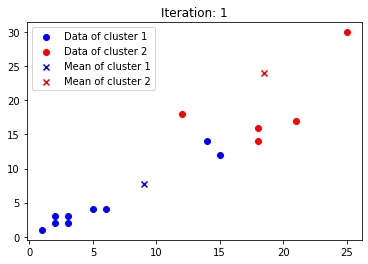

Allocation of points to means - iteration: 2
These are the points closer to mean 1: [0, 1, 2, 3, 4, 5, 6]
These are the points closer to mean 2: [7, 8, 9, 10, 11, 12, 13]
Means at iteration: 2
[[ 5.66666667  5.        ]
 [18.8        19.        ]]


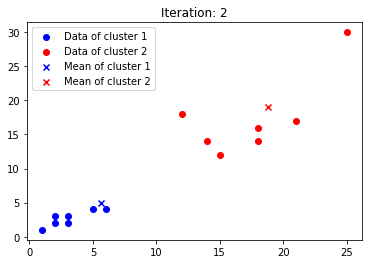

Allocation of points to means - iteration: 3
These are the points closer to mean 1: [0, 1, 2, 3, 4, 5, 6]
These are the points closer to mean 2: [7, 8, 9, 10, 11, 12, 13]
Means at iteration: 3
[[ 3.14285714  2.71428571]
 [17.57142857 17.28571429]]


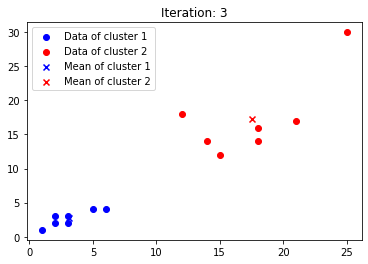

In [4]:
for i in range(0, 4):
    
    # Initialze arrays to hold which points belong to which mean
    points_mean_1 = []
    points_mean_2 = []

    # Compute Euclidean distances of each point in our dataset from both means, and check which is smallest

    for j in range(0, len(data)):

        dist1 = math.sqrt(math.pow(data[j,0] - means[0,0], 2) + math.pow(data[j,1] - means[0,1], 2))
        dist2 = math.sqrt(math.pow(data[j,0] - means[1,0], 2) + math.pow(data[j,1] - means[1,1], 2))

        if dist1 < dist2:
            points_mean_1.append(j)
        else:
            points_mean_2.append(j)

    # Intermediate results for the current iteration
            
    print("Allocation of points to means - iteration: " + str(i))
    print("These are the points closer to mean 1: " + str(points_mean_1))
    print("These are the points closer to mean 2: " + str(points_mean_2))
    
    print("Means at iteration: " + str(i))
    print(means)
    
    # Prepare data to be plotted
    
    points_1 = []
    
    for point in points_mean_1:
        points_1.append(data[point])

    points_2 = []

    for point in points_mean_2:
        points_2.append(data[point])
    
    np_points_1 = np.array(points_1)
    np_points_2 = np.array(points_2)
    
    # Make an intermediate plot of the data points and the respective means
    
    plt.figure()
    plt.title("Iteration: " + str(i))
    plt.scatter(np_points_1[:,0], np_points_1[:,1], c='b', marker='o', label="Data of cluster 1")
    plt.scatter(np_points_2[:,0], np_points_2[:,1], c='r', marker='o', label="Data of cluster 2")
    plt.scatter(means[0,0], means[0,1], c='b', marker='x', label="Mean of cluster 1")
    plt.scatter(means[1,0], means[1,1], c='r', marker='x', label="Mean of cluster 2")
    plt.legend()
    plt.show()


    # Update the means for the next iteration

    tmp_mean_1 = 0

    for j in range(0, len(points_mean_1)):
        tmp_mean_1 += data[points_mean_1[j]]

    means[0] = tmp_mean_1/len(points_mean_1)

    tmp_mean_2 = 0
    
    for j in range(0, len(points_mean_2)):
        tmp_mean_2 += data[points_mean_2[j]]
    
    means[1] = tmp_mean_2/len(points_mean_2)





Allocation of points to means
[0, 1, 2, 3, 4, 5, 6]
[7, 8, 9, 10, 11, 12, 13]
Final means:
[[ 3.14285714  2.71428571]
 [17.57142857 17.28571429]]


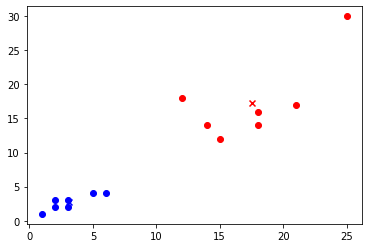

In [5]:
print("Allocation of points to means")
print(points_mean_1)
print(points_mean_2)

print("Final means:")
print(means)

points_1 = []

for point in points_mean_1:
    points_1.append(data[point])

points_2 = []

for point in points_mean_2:
    points_2.append(data[point])

np_points_1 = np.array(points_1)
np_points_2 = np.array(points_2)

plt.figure()
plt.scatter(np_points_1[:,0], np_points_1[:,1], c='b', marker='o')
plt.scatter(np_points_2[:,0], np_points_2[:,1], c='r', marker='o')
plt.scatter(means[0,0], means[0,1], c='b', marker='x')
plt.scatter(means[1,0], means[1,1], c='r', marker='x')
plt.show()



### B. Using sklearn

In [6]:
# We now import the KMeans module in sklearn
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [7]:
# Generate the data in the same way as before

data = np.array([[2,2], [2,3], [3,2], [3,3], [5,4], [1,1], [6,4], [15,12], [14,14], [18,14], [25,30], [21,17], [18,16], [12,18]])



In [8]:
# We can use a one-liner to fit our data using 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0).fit(data)
print("The final means of each cluster: " + str(kmeans.cluster_centers_))
print("Label per data point indicating the final cluster it has been assigned to: " + str(kmeans.labels_))
print("We can predict new values using e.g. kmeans.predict([[0, 0], [4, 4]])")
print("Result = " + str(kmeans.predict([[0, 0], [17, 15]])))



The final means of each cluster: [[17.57142857 17.28571429]
 [ 3.14285714  2.71428571]]
Label per data point indicating the final cluster it has been assigned to: [1 1 1 1 1 1 1 0 0 0 0 0 0 0]
We can predict new values using e.g. kmeans.predict([[0, 0], [4, 4]])
Result = [1 0]
